In [1]:
import gym
from Prioritized_Replay_DQN_RL_brain import DQNPrioritizedReplay
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

env = gym.make('MountainCar-v0')
env = env.unwrapped
env.seed(21)
MEMORY_SIZE = 10000

sess = tf.Session()
with tf.variable_scope('natural_DQN'):
    RL_natural = DQNPrioritizedReplay(
        n_actions=3, n_features=2, memory_size=MEMORY_SIZE,
        e_greedy_increment=0.00005, sess=sess, prioritized=False,
    )

with tf.variable_scope('DQN_with_prioritized_replay'):
    RL_prio = DQNPrioritizedReplay(
        n_actions=3, n_features=2, memory_size=MEMORY_SIZE,
        e_greedy_increment=0.00005, sess=sess, prioritized=True, output_graph=True,
    )
sess.run(tf.global_variables_initializer())


def train(RL):
    total_steps = 0
    steps = []
    episodes = []
    for i_episode in range(20):
        observation = env.reset()
        while True:
            # env.render()

            action = RL.choose_action(observation)

            observation_, reward, done, info = env.step(action)

            if done: reward = 10

            RL.store_transition(observation, action, reward, observation_)

            if total_steps > MEMORY_SIZE:
                RL.learn()

            if done:
                print('episode ', i_episode, ' finished')
                steps.append(total_steps)
                episodes.append(i_episode)
                break

            observation = observation_
            total_steps += 1
    return np.vstack((episodes, steps))

his_natural = train(RL_natural)
his_prio = train(RL_prio)

Instructions for updating:
Colocations handled automatically by placer.

target_params_replaced


target_params_replaced

episode  0  finished

target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced

episode  1  finished

target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced

episode  2  finished

target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_

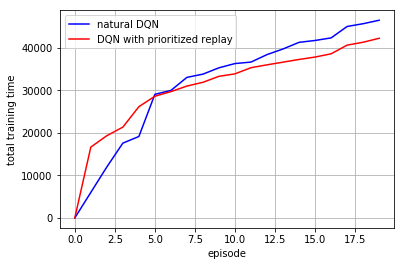

In [2]:
# compare based on first success
plt.plot(his_natural[0, :], his_natural[1, :] - his_natural[1, 0], c='b', label='natural DQN')
plt.plot(his_prio[0, :], his_prio[1, :] - his_prio[1, 0], c='r', label='DQN with prioritized replay')
plt.legend(loc='best')
plt.ylabel('total training time')
plt.xlabel('episode')
plt.grid()
plt.show()